# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss

, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score
pd.set_option('display.max_columns', None)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load Data

In [2]:
tracks = pd.read_csv('./data/tracks.csv')

### Data Information

The data used for this project were over 586,000 songs taken from the Spotify API. These songs release dates range from 1921 to 2020. Since Spotify is a world wide used music streaming service we will be working with songs released all around the world.

# Data Cleaning

In [3]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
# checking for null values, only one of the features shows null values, name has 71 null values
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [5]:
tracks.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [7]:
# removing null values
tracks = tracks[tracks['name'].notna()]

In [12]:
# instead of dropping na i will be looking for each name indivitually

In [13]:
# dropping columns that i will not be using in models
tracks.drop(columns=['id', 'name', 'artists', 'id_artists'], inplace=True)

In [14]:
# changin release_date from obj to date_time
tracks['release_date'] = pd.to_datetime(tracks['release_date'],format='%Y-%m-%d')

In [15]:
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_category
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,0.923916
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,0.265133
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,1.000000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,1.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,1.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,1.000000


In [16]:
# checking how popularity is distributed
tracks['popularity'].value_counts()

0      44631
35     12231
23     12139
1      12024
36     11879
       ...  
93         2
95         1
100        1
99         1
98         1
Name: popularity, Length: 101, dtype: int64

### 'popularity' column

    The popularity column is a category set by Spotify that has a range from 0-100. The popularity score reflects the amount of times the song has been played in comparison to the other songs. Some things to note is that because Spotify is new in comparison to some of the songs we are using the popularity score on older songs could have been higher if spotify was around when the song was released. We tend to see the higher scoring songs were made in recent years.

In [66]:
tracks.dtypes

popularity                      int64
duration_ms                     int64
explicit                        int64
release_date           datetime64[ns]
danceability                  float64
energy                        float64
key                             int64
loudness                      float64
mode                            int64
speechiness                   float64
acousticness                  float64
instrumentalness              float64
liveness                      float64
valence                       float64
tempo                         float64
time_signature                  int64
popularity_category             int64
dtype: object

|Feature|Type|Description|                                 
|---|---|---|
|**popularity**|*int*|Popularity of tracks scores (0-100), scores were populated by Spotify and is scored by the number of times the song has been played.|
|**explicit**|*int*|Determines if the song is explicit or not.|
|**duration_ms**|*int*|Duration of track in milliseconds.| 
|**release_date**|*datetime*|The date the song was released on.| 
|**danceability**|*float*|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.| 
|**energy**|*float*|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.| 
|**key**|*int*|The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.| 
|**loudness**|*float*|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.| 
|**mode**|*int*|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|**speechiness**|*float*|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.| 
|**acousticness**|*float*|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.| 
|**instrumentalness**|*float*|Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.| 
|**liveness**|*float*|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.| 
|**valence**|*float*|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).| 
|**tempo**|*float*|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.| 
|**time_signature**|*int*|An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".| 
|**popularity_category**|*int*|This feature was created to make the popularity column binary. If a song had a popularity score above 0, a score of 1 was given to it. If a song had a popularity score of 0 a score of 0 was given.| 

# EDA

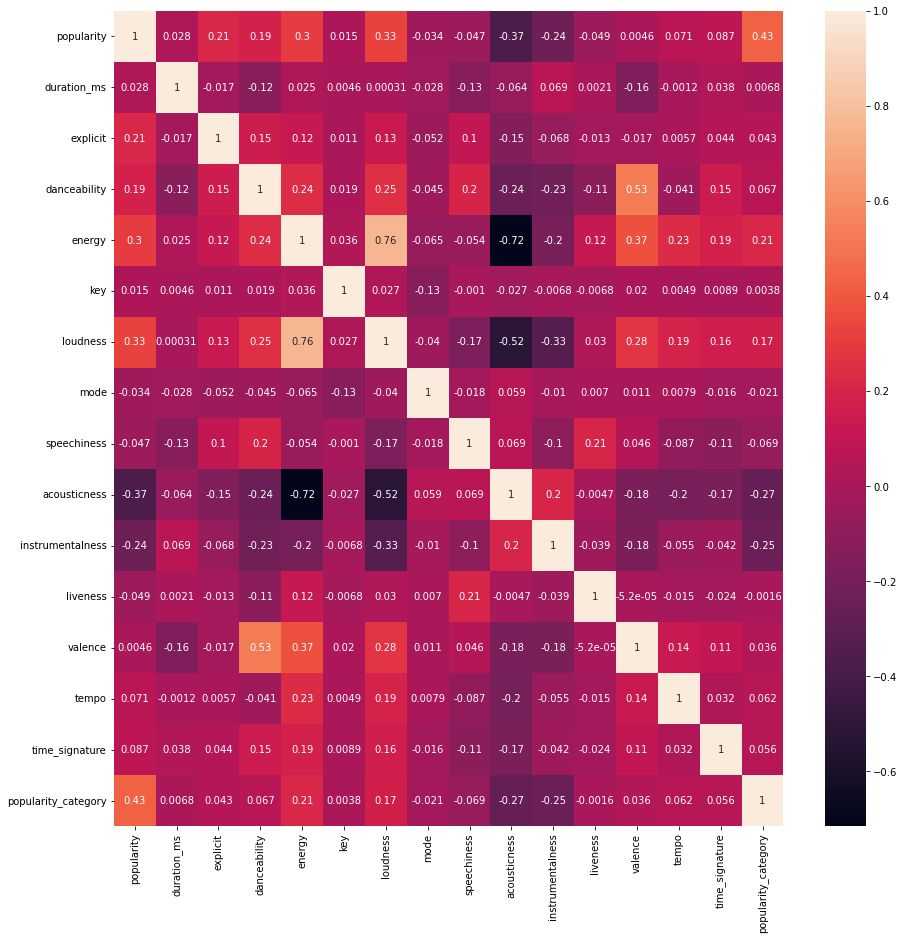

In [17]:
# heatmap
plt.figure(figsize = (15,15))
sns.heatmap(tracks.corr(), annot=True);

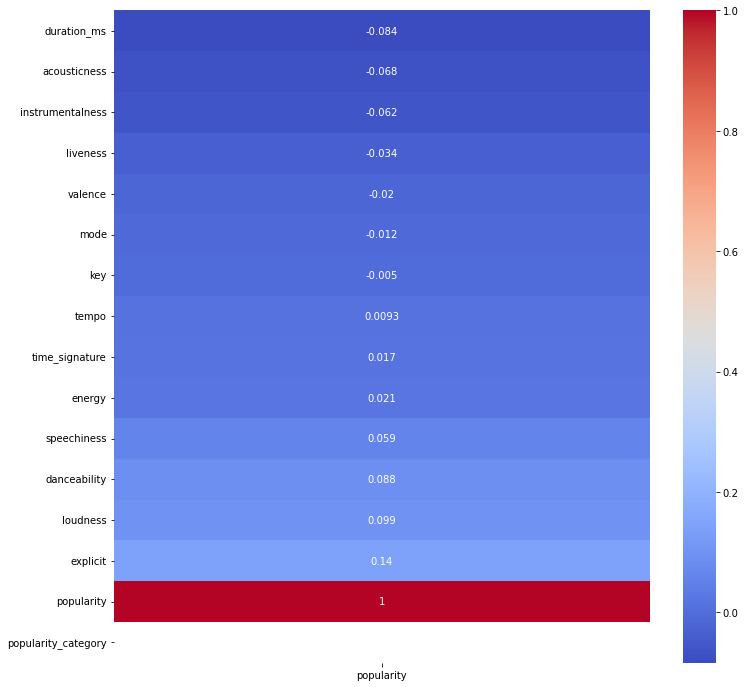

In [18]:
plt.figure(figsize = (12,12))

sns.heatmap(tracks[tracks['popularity'] > 50].corr()[['popularity']].sort_values('popularity'), annot=True,cmap ='coolwarm');

### HeatMaps
In these heatmaps we were able to see that popularity does not have a really strong correlation to one feature. The strongest one I noticed was 'loudness'(0.33), 'energy'(0.3), and 'explicit'(0.21). I would also be important to note that 'acousticness' had a negative correlation with a score of (-0.37), aswell with instrumentalness with a score of (-0.24).

/Users/josedelgadillo/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


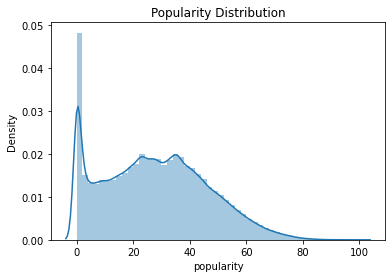

In [19]:
sns.distplot(tracks['popularity']).set_title('Popularity Distribution');

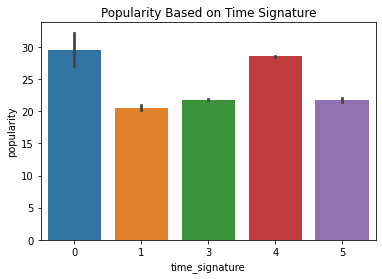

In [20]:
sns.barplot(x = 'time_signature', y = 'popularity', data = tracks)
plt.title('Popularity Based on Time Signature');

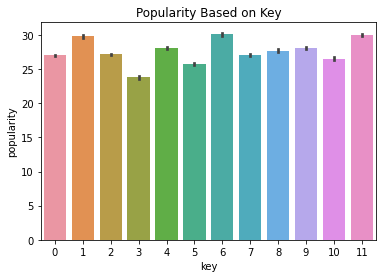

In [21]:
sns.barplot(x = 'key', y = 'popularity', data = tracks)
plt.title('Popularity Based on Key');

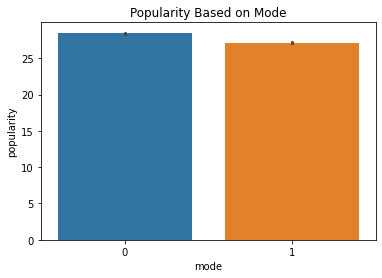

In [22]:
sns.barplot(x = 'mode', y = 'popularity', data = tracks)
plt.title('Popularity Based on Mode');

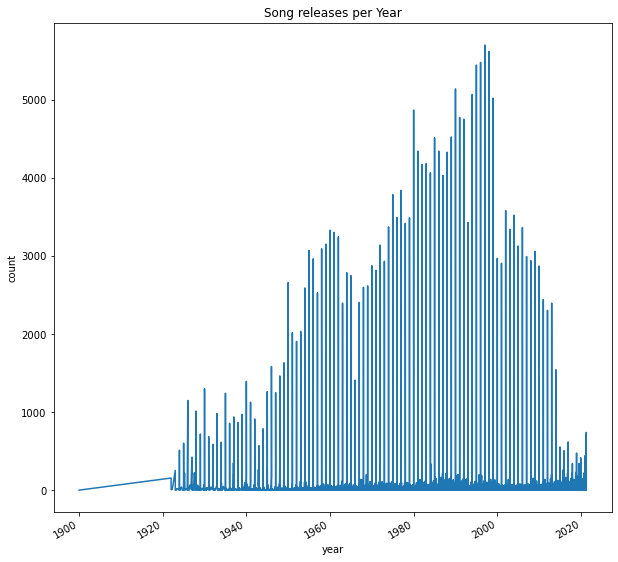

In [23]:
tracks['release_date'].value_counts().sort_index().plot(figsize=(10,10))
plt.title('Song releases per Year')
plt.xlabel('year')
plt.ylabel('count');

### EDA I Summary:
    
    Looking at the heat map gave a decent way to be able to see what features correlate to popularity and with each other. So far I did not see huge correlations between popularity and other features that were noticable besides the ones mentioned in the heatmap summary. 'Key', 'Time Signature', and 'Mode' are also not as important to help categorize because when looking at the graphs they seem to be evenly distributed.
    As we can see in the 'release date' graph above, most songs I am working with are release in the 1980s through the 2000s. Even with that being the case we still see most high popularity scores linked to songs released in 2018, 2019, 2020 because like i mentioned above, Spotify has become more popular in recent years.

# EDA II

We are splitting the popularity into two categories, 1 if the song has a popularity score above 0, and 0 if the song has a popularity score of 0. This is makes our popularity score data very unbalanced but by doing this it'll help us classify between a popularity score much better and our results should be better aswell.

In [24]:
popularity_category = []

for i in tracks['popularity']:
    if i == 0:
        popularity_category.append(0)
    else:
        popularity_category.append(1)

print(len(popularity_category))

586601


In [25]:
tracks['popularity_category'] = popularity_category

In [26]:
tracks['popularity_category'].describe()

count    586601.000000
mean          0.923916
std           0.265133
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: popularity_category, dtype: float64

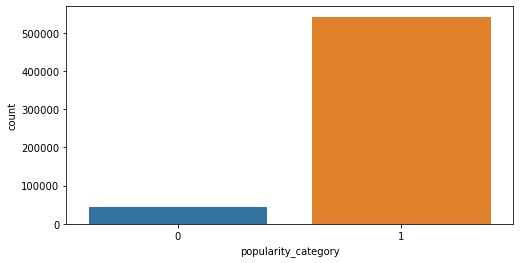

In [27]:
# response_category count plot

plt.figure(figsize=(8,4))
sns.countplot(data = tracks, x = 'popularity_category');

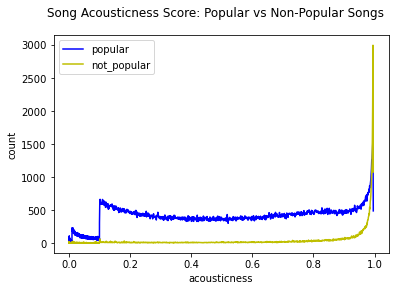

In [40]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['acousticness'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['acousticness'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('acousticness')
ax.set_ylabel('count')

fig.suptitle('Song Acousticness Score: Popular vs Non-Popular Songs')

ax.legend();

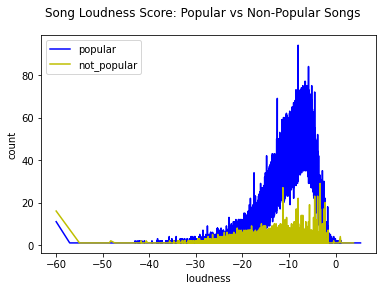

In [41]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['loudness'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['loudness'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('loudness')
ax.set_ylabel('count')

fig.suptitle('Song Loudness Score: Popular vs Non-Popular Songs')

ax.legend();

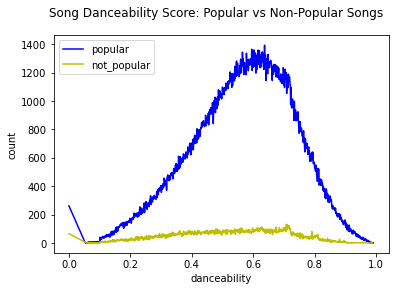

In [67]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['danceability'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['danceability'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('danceability')
ax.set_ylabel('count')

fig.suptitle('Song Danceability Score: Popular vs Non-Popular Songs')

ax.legend();

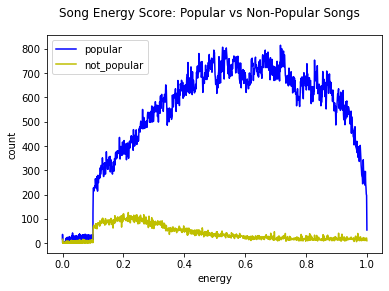

In [43]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['energy'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['energy'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('energy')
ax.set_ylabel('count')

fig.suptitle('Song Energy Score: Popular vs Non-Popular Songs')

ax.legend();

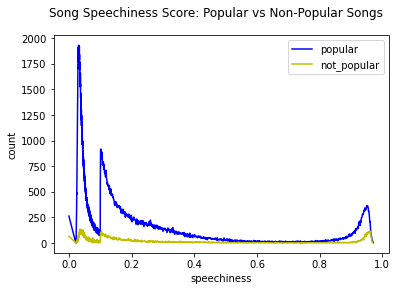

In [44]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['speechiness'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['speechiness'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('speechiness')
ax.set_ylabel('count')

fig.suptitle('Song Speechiness Score: Popular vs Non-Popular Songs')

ax.legend();

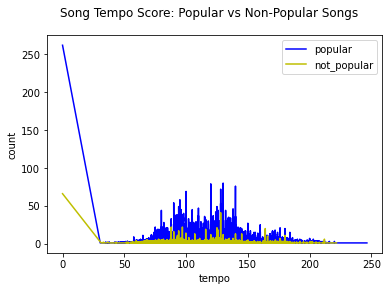

In [45]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['tempo'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['tempo'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('tempo')
ax.set_ylabel('count')

fig.suptitle('Song Tempo Score: Popular vs Non-Popular Songs')

ax.legend();

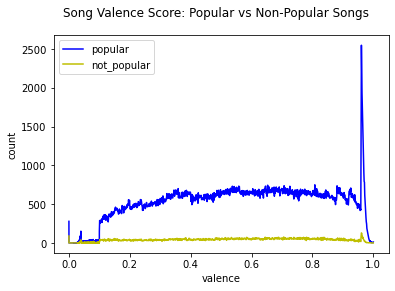

In [46]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['valence'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['valence'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('valence')
ax.set_ylabel('count')

fig.suptitle('Song Valence Score: Popular vs Non-Popular Songs')

ax.legend();

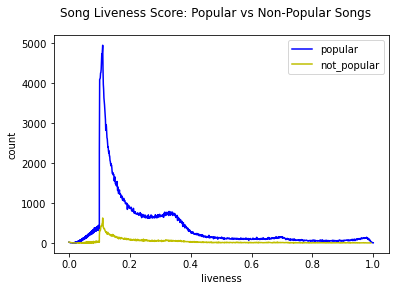

In [47]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['liveness'].value_counts().sort_index(), color='b', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['liveness'].value_counts().sort_index(), color='y', label='not_popular')

ax.set_xlabel('liveness')
ax.set_ylabel('count')

fig.suptitle('Song Liveness Score: Popular vs Non-Popular Songs')

ax.legend();

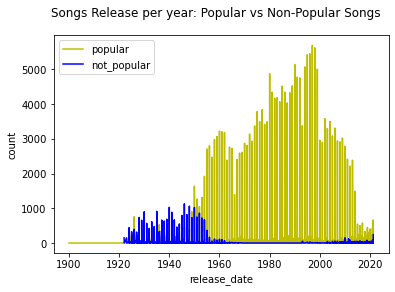

In [48]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['release_date'].value_counts().sort_index(), color='y', label='popular')
ax.plot(tracks[tracks['popularity_category']== 0]['release_date'].value_counts().sort_index(), color='b', label='not_popular')

ax.set_xlabel('release_date')
ax.set_ylabel('count')

fig.suptitle('Songs Release per year: Popular vs Non-Popular Songs')

ax.legend();

### EDA II Summary:

    After splitting the popularity feature into binary, in some of the graphs we can clearly see how some features will noticeably have a good split, where if the song is popular it will have a higher score in the feature and if the song is not popular it will have a lower score. 'energy' and 'acousticness' are the two more obvious features that show us that relationship. For 'energy', if the song is popular, the 'energy' score will be much higher than if the song is not popular. 
    I see something similar for 'acousticness', for 'acousticness' we have a negative correlation score. If the song is not popular, the 'acousticness' score will be much higher than if the song is popular. Even with the feature having a negative corelation with popularity, I still want to make sure we keep it because it is a very good way to be able to differentiate between popularity.
    In a few of the other charts, the graphs seemed to mimick each other. Liveness is a good example of features that might not have much of an impact on the popularity score. The graph is almost identical to each other, popular just has a bigger graph because of the data imbalance. I still decided to keep those in because our data has very few features to work with.

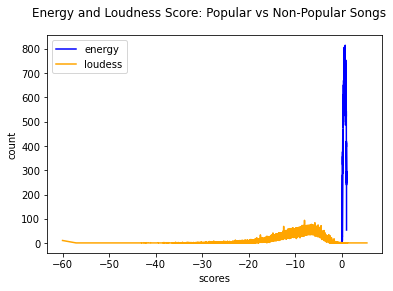

In [60]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['energy'].value_counts().sort_index(), color='b', label='energy')
ax.plot(tracks[tracks['popularity_category']== 1]['loudness'].value_counts().sort_index(), color='orange', label='loudess')

ax.set_xlabel('scores')
ax.set_ylabel('count')

fig.suptitle('Energy and Loudness Score: Popular vs Non-Popular Songs')

ax.legend();

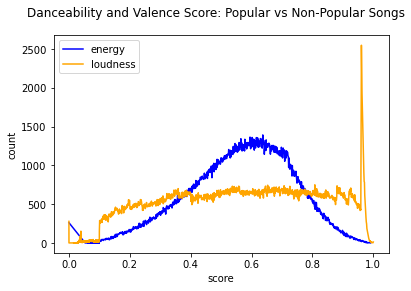

In [61]:
fig, ax = plt.subplots()

ax.plot(tracks[tracks['popularity_category']== 1]['danceability'].value_counts().sort_index(), color='b', label='energy')
ax.plot(tracks[tracks['popularity_category']== 1]['valence'].value_counts().sort_index(), color='orange', label='loudness')

ax.set_xlabel('score')
ax.set_ylabel('count')

fig.suptitle('Danceability and Valence Score: Popular vs Non-Popular Songs')

ax.legend();

    For the two graphs above, I wanted to see if I could find any insights on the data when comparing two different features and their popularity scores but I did not notice much. 

## Feature Importance

In [62]:
X = tracks.drop(columns=['popularity', 'popularity_category', 'release_date'])
y = tracks['popularity_category']

#test/train/split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.23,
                                                    random_state=42,
                                                    stratify=y
                                                   )

In [63]:
# choosing model to do feature importance
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

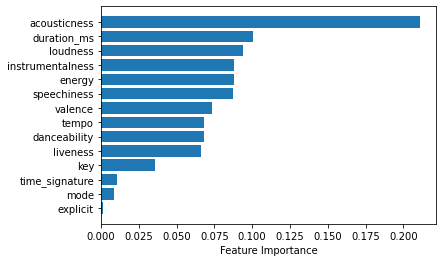

In [64]:
# feature importance 
feature_names = X.columns
sort = rf.feature_importances_.argsort()
plt.barh(feature_names[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

### Feature Importance Summary:

    The feature importance model used a forest of trees to evaluate the importance of each feature. This gives me another view at what features are very important to keep to classify popularity. We can see that 'acousticness' is by far the most popular of the feautures, and we were also able to see that when comparing the graphs in the EDA II portion. We also see almost no imortance in 'key', 'time signature', and 'mode', which helps us confirm the analysis we did in EDA I.

In [65]:
# writing clean dataframe to a csv

tracks.to_csv('./data/tracks_clean.csv', index=False)